### Header

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress as linr
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

### Correlation vs. Number of points

In [9]:
for sim_size in range(2, 7):
    sim_size = 10**sim_size
    a = np.random.randn(sim_size)
    b = np.random.randn(sim_size)
    c = np.corrcoef(a, b)[0, 1]
    print '{0} points, corr coef {1:.4f}'.format(sim_size, c)

100 points, corr coef -0.0300
1000 points, corr coef -0.0044
10000 points, corr coef 0.0045
100000 points, corr coef -0.0045
1000000 points, corr coef -0.0005


### Correlation when there are outliers

correlation: -0.00814094817782
p_val: 0.415641205794


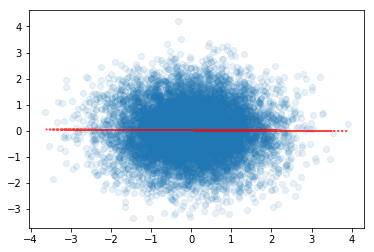

correlation: 0.0761493670228
p_val: 1.81501498031e-14


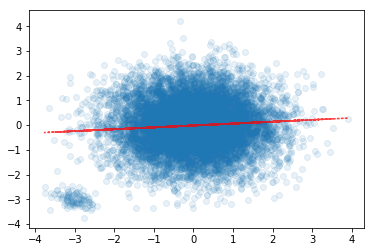

correlation: 0.451005126714
p_val: 0.0


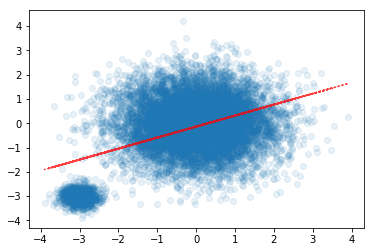

In [24]:
a = np.random.randn(10000)
b = np.random.randn(10000)

c1 = np.corrcoef(a, b)[0, 1]
print 'correlation:', c1
slope, intercept, r_value, p_value, std_err = linr(a, b)
print 'p_val:', p_value

b_pred = a*slope + intercept
plt.scatter(a, b, alpha = 0.1)
plt.plot(a, b_pred, 'r:',alpha = 0.75)
plt.show()

aa = np.random.randn(100) * 0.25 - 3
bb = np.random.randn(100) * 0.25 - 3 
a2 = np.hstack((a, aa))
b2 = np.hstack((b, bb))

c2 = np.corrcoef(a2, b2)[0, 1]
print 'correlation:', c2
slope, intercept, r_value, p_value, std_err = linr(a2, b2)
print 'p_val:', p_value

b_pred = a2*slope + intercept
plt.scatter(a2, b2, alpha = 0.1)
plt.plot(a2, b_pred, 'r:',alpha = 0.75)
plt.show()

aa = np.random.randn(1000) * 0.25 - 3
bb = np.random.randn(1000) * 0.25 - 3 
a2 = np.hstack((a, aa))
b2 = np.hstack((b, bb))

c2 = np.corrcoef(a2, b2)[0, 1]
print 'correlation:', c2
slope, intercept, r_value, p_value, std_err = linr(a2, b2)
print 'p_val:', p_value

b_pred = a2*slope + intercept
plt.scatter(a2, b2, alpha = 0.1)
plt.plot(a2, b_pred, 'r:',alpha = 0.75)
plt.show()

### Correlation with normalization and standardization

In [14]:
a = np.random.randn(10000) * 9 + 100
b = np.random.randn(10000) * -17 + 450

c1 = np.corrcoef(a, b)[0, 1]
print 'raw:', c1

a_miu = np.mean(a); a_sigma = np.std(a)
a_min = np.min(a); a_max = np.max(a); a_range = a_max - a_min
b_miu = np.mean(b); b_sigma = np.std(b)
b_min = np.min(b); b_max = np.max(b); b_range = b_max - b_min

a_norm = (a - a_min) / a_range
b_norm = (b - b_min) / b_range
c15 = np.corrcoef(a_norm, b_norm)[0, 1]
print 'normed:', c15

a_offset = a - a_miu
b_offset = b - b_miu
c2 = np.corrcoef(a_offset, b_offset)[0, 1]
print 'offset:', c2

a_stand = a_offset / a_sigma
b_stand = b_offset / b_sigma
c3 = np.corrcoef(a_stand, b_stand)[0, 1]
print 'standardized:', c3

raw: -0.0156712770758
normed: -0.0156712770758
offset: -0.0156712770758
standardized: -0.0156712770758


### Non-linear relation

correlation: -0.69311069443
p_val: 1.34129913162e-15
R2: 0.480402434733


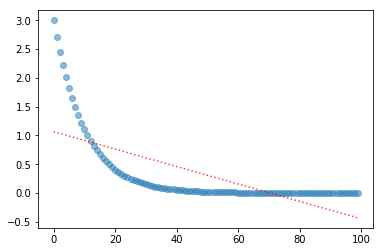

In [19]:
x = np.arange(100)
y = 3*np.exp(-0.1* x)

c = np.corrcoef(x, y)[0, 1]
print 'correlation:', c

slope, intercept, r_value, p_value, std_err = linr(x, y)
print 'p_val:', p_value
print 'R2:', r_value**2

y_pred = x*slope + intercept
plt.plot(x, y, 'o', alpha = 0.5)
plt.plot(x, y_pred, 'r:', alpha = 0.75)
plt.show()

### Calculate R2, an d other metrics

p_val: 1.18219857719e-35
R2: 0.796504667512
R2 calc: 0.0
Explained variance: 0.796504667512
R2 sklearn: 0.796504667512
MSE sklearn: 0.609217649814


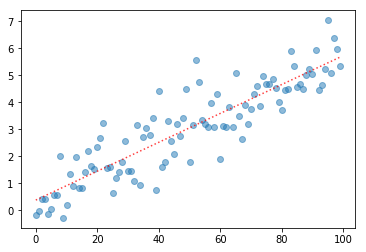

In [23]:
def calc_r2(y_pred, y):
    e = y - y_pred
    squared_e = map(lambda x: x**2, e)
    sse = reduce(lambda x,y: x+y, squared_e)
    
    e = y - np.mean(y)
    squared_e = map(lambda x: x**2, e)
    sst = reduce(lambda x,y: x+y, squared_e)
    r2 = 1 - float(sse) / sst
    return r2

x = np.arange(100)
y = 0.05*x + 0.5 
y += 0.75*np.random.randn(100)

slope, intercept, r_value, p_value, std_err = linr(x, y)
print 'p_val:', p_value
print 'R2:', r_value**2

y_pred = slope*x + intercept
print 'R2 calc:', calc_r2([np.mean(y)]*len(y), y)

print 'Explained variance:', explained_variance_score(y, y_pred)
print 'R2 sklearn:', r2_score(y, y_pred)
print 'MSE sklearn:', mean_squared_error(y, y_pred)

plt.plot(x, y, 'o', alpha = 0.5)
plt.plot(x, y_pred, 'r:', alpha = 0.75)
plt.show()